## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k, rep = False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace = rep)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[ 7, 94, 95],
       [19, 29, 91],
       [56, 61, 97],
       [50, 77, 85],
       [12, 78, 88],
       [13, 71, 98]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 7, 94, 95]), array([19, 29, 91]))

The lowest card in the game is

In [6]:
np.min(cards)

7

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

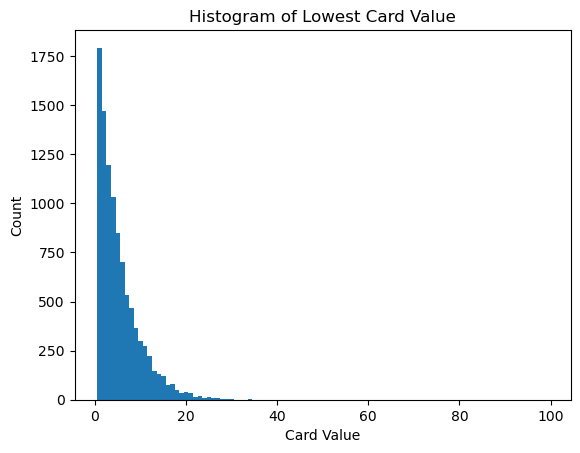

In [17]:
def create_lowest(N,n,k,m,rep):
    """
    Generates a list of the lowest card value in m simulated games. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - m : Number of simulations of one game
        - rep: boolean indicating whether to sample with replacement 
        
    Returns: 
        - list of the lowest card in m simulated games. 
    """
    lowest = []
    # repeat sampling of cards m times and store lowest in an array called lowest
    for i in range(m):
        cards = sample_cards(N,n,k,rep)
        curr_min = np.min(cards)
        lowest.append(curr_min)
    return lowest 
    
N = 100
n = 6
k = 3
# repeat sampling m times 
m = 10000

# create histogram of distribution 
plt.hist(create_lowest(N,n,k,m,rep = False), bins = np.arange(0.5, N + 0.5, 1))
plt.title("Histogram of Lowest Card Value")
plt.ylabel("Count")
plt.xlabel("Card Value")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [31]:
# find the largest consecutive gap between all cards
# code implemented from Facu from his Ed post 

def find_largest_gap_pool(N, n, k):
    
    cards = sample_cards(N,n,k)
    # now generate a template with the same shape of cards
    # but with the player ids so we can track them after sorting
    player_ids = np.tile(np.arange(1, n+1), (k, 1)).T 
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    # sort cards but get the indices instead 
    order_ids = np.argsort(flat_cards)
    # compute the consecutive differences and find the max
    gap_cards = np.diff(flat_cards[order_ids])
    pool_players_max = np.max(gap_cards)
    return pool_players_max

In [36]:
find_largest_gap_pool(100,6,3)

17

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [37]:
# code implemented from Facu's Ed discussion post

def find_largest_gap(N, n, k):
    
    cards = sample_cards(N,n,k)
    # now generate a template with the same shape of cards
    # but with the player ids so we can track them after sorting
    player_ids = np.tile(np.arange(1, n+1), (k, 1)).T 
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    # sort cards but get the indices instead 
    order_ids = np.argsort(flat_cards)
    # compute the consecutive differences and find the max
    gap_cards = np.diff(flat_cards[order_ids])
    # find when consecutive differences come from the same player 
    # (gap_id == 0)
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    # find maximum difference 
    different_players_max = np.max(gap_unique)
    return different_players_max

In [40]:
find_largest_gap(100,6,3)

15

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [41]:
# To Do cell

def simulate_games(n,k,m,j):
    # j is how many times to repeat card games in 1 simulation
    # m is how many total simulations to run 
    pool_max_means = []
    diff_max_means = []

    for i in range(m):
        pool_max = []
        diff_max = []
        for i in range(j):
            pool_max.append(find_largest_gap_pool(100, n, k))
            diff_max.append(find_largest_gap(100, n, k))
        # add mean of current sample to means vectors
        # then reset the means vectors 
        pool_max_means.append(np.mean(pool_max))
        pool_max = []
        diff_max_means.append(np.mean(diff_max))
        diff_max = []
    return [pool_max_means,diff_max_means]


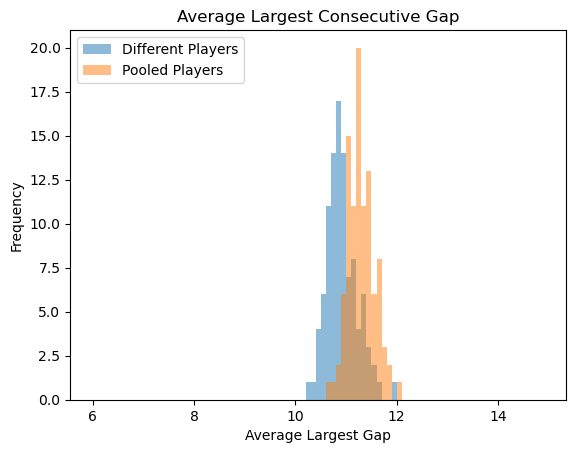

In [42]:
n = 6
k = 5
m = 100 # how many simulations 
j = 100 # how many times to repeat card games in 1 simulation

means = simulate_games(n,k,m,j)
pool_max_means = means[0]
diff_max_means = means[1]

plt.hist(diff_max_means,bins = np.arange(6,15,.1), alpha = 0.5, label = "Different Players")
plt.hist(pool_max_means,bins = np.arange(6,15,.1), alpha = 0.5, label = "Pooled Players")
plt.legend(loc = "upper left")
plt.title("Average Largest Consecutive Gap")
plt.xlabel("Average Largest Gap")
plt.ylabel("Frequency")
# hide the printed output 
plt.show()

I simulated a card game 100 times and took the mean of the largest gap within these 100 games. I then repeated this simulation 100 times, resulting in 100 sample means (the averages). These histograms are a plot of the sample means. As you can see, the sample mean for the largest consecutive gap between different players is on average smaller than the largest consecutive gap for all pooled players. 

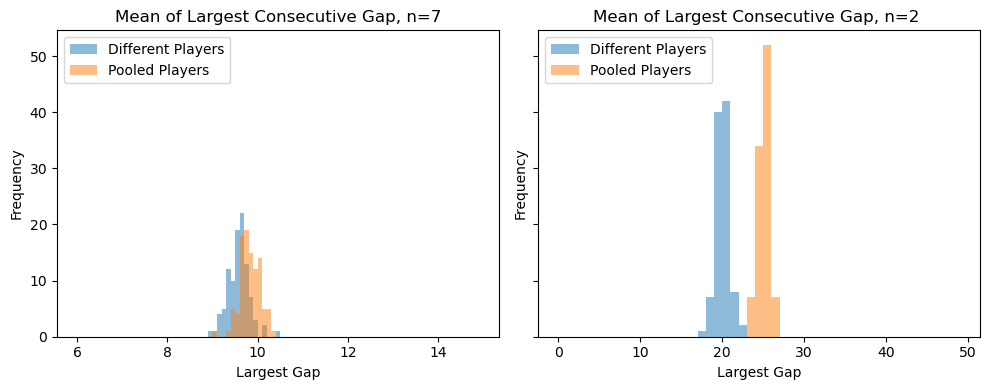

In [43]:
n = 6
k = 5
m = 100
j = 100

means_1 = simulate_games(n=7,k=k,m=m,j=j)
pool_max_means_1 = means_1[0]
diff_max_means_1 = means_1[1]

means_2 = simulate_games(n=2,k=k,m=m,j=j)
pool_max_means_2 = means_2[0]
diff_max_means_2 = means_2[1]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, tight_layout=True)

ax[0].hist(diff_max_means_1,bins = np.arange(6,15,.1), alpha = 0.5, label = "Different Players")
ax[0].hist(pool_max_means_1,bins = np.arange(6,15,.1), alpha = 0.5, label = "Pooled Players")
ax[0].legend(loc = "upper left")
ax[0].set_title("Mean of Largest Consecutive Gap, n=7")
ax[0].set_xlabel("Largest Gap")
ax[0].set_ylabel("Frequency")

ax[1].hist(diff_max_means_2,bins = np.arange(0,50,1), alpha = 0.5, label = "Different Players")
ax[1].hist(pool_max_means_2,bins = np.arange(0,50,1), alpha = 0.5, label = "Pooled Players")
ax[1].legend(loc = "upper left")
ax[1].set_title("Mean of Largest Consecutive Gap, n=2 ")
ax[1].set_xlabel("Largest Gap")
ax[1].set_ylabel("Frequency")

plt.show()

When n is larger, the difference between the means of the two distributions are smaller. As n gets smaller, the difference increases.


Notes from class. say pool is A and diff is B.
the maximum of B is the maximum of a subset of A
Therefore A should theoretically always be larger than B. stochastic dominance. 


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [9]:
def sample_game(N, n, k, rep):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    Same as sample_cards() but cards are not sorted. This makes it possible to simulate
    a binomial distribution later.
    User can also control if they are sampling with replacement or not. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - rep: Boolean to indicate whether to sample with replacement 
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their cards
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=rep)
    _cards = _cards.reshape(n,k)
    #_cards.sort(axis=1)
    return _cards

In [25]:
# derive something that has binomial distribution 
def count_successes(cards, N, p):
    # success is if the first card for each player
    # is below p*N
    first_cards = cards[:, 1]
    # return the sum of these bernoulli trials 
    # as a binomial value 
    return (first_cards <= (p*N)).sum()

# example of one binomial simulation 

N = 100  # Total number of cards
n = 15   # Number of players
k = 3   # Number of cards per player
p = 0.3  # Success probability

sampled_cards = sample_game(N,n,k,False)
success_count = count_successes(sampled_cards, N, p)

print(success_count)

5


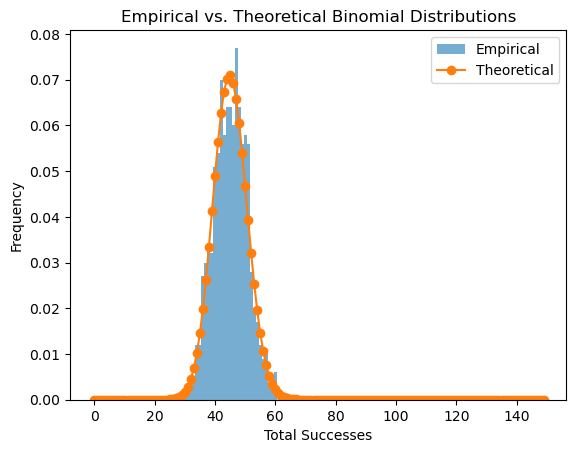

In [27]:
# run multiple simulations and compare to the theoretical distribution 
from scipy.stats import binom

N = 100000  # Total number of cards
n = 150   # Number of players
k = 3    # Number of cards per player
p = 0.3  # Success probability
s = 1000  # the number of simulations 

# simulate s binomial's
successes = [count_successes(sample_game(N, n, k, False), N, p) for i in range(s)]

# Plot empirical distribution
plt.hist(successes, bins = np.arange(n)-0.5, density=True, alpha=0.6, label="Empirical")

# Overlay with theoretical binomial distribution PMF
x = np.arange(0, n)
plt.plot(x, binom.pmf(x, n, p), 'o-', label="Theoretical")

plt.legend()
plt.xlabel("Total Successes")
plt.ylabel("Frequency")
plt.title("Empirical vs. Theoretical Binomial Distributions")
plt.show()


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

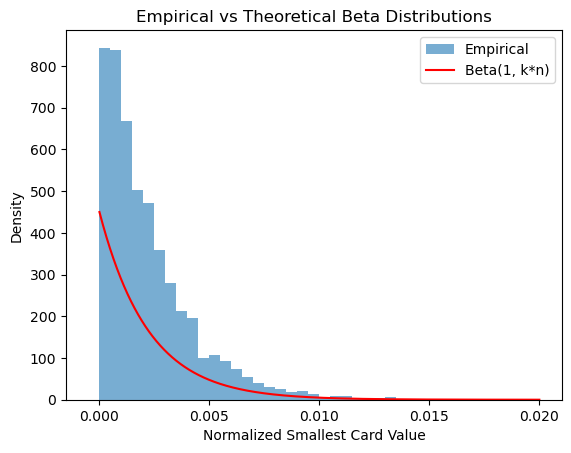

In [68]:
from scipy.stats import beta

N = 10000  # Total number of cards
n = 150   # Number of players
k = 3    # Number of cards per player
s = 5000 # the number of simulations 

# create histogram of distribution from Part 1
lowest = create_lowest(N,n,k,s,rep = False)
normalized = [i/N for i in lowest]
plt.hist(normalized, bins = np.arange(-.0005, .0205, .0005), alpha = 0.6,label = "Empirical")
plt.title("Histogram of Lowest Card Value")
plt.ylabel("Count")
plt.xlabel("Normalized Card Value")

# Overlay with theoretical Beta distribution PDF
x = np.linspace(0, 0.02, 1000)
plt.plot(x, beta.pdf(x, 1, k*n), 'r-', label="Beta(1, k*n)")

plt.legend()
plt.xlabel("Normalized Smallest Card Value")
plt.ylabel("Density")
plt.title("Empirical vs Theoretical Beta Distributions")
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

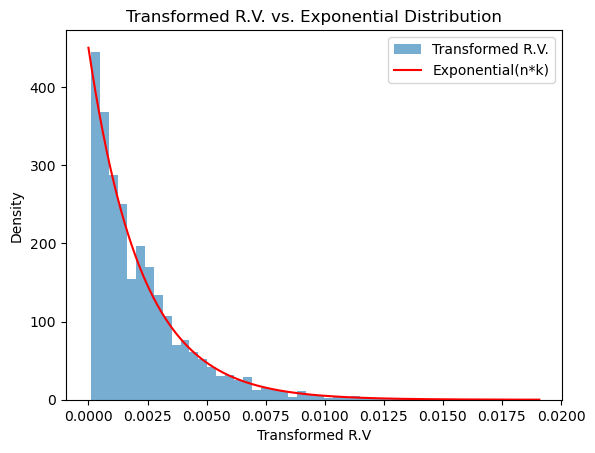

In [69]:
transformed_rv = [-np.log(1 - u/N) for u in lowest]

# Plot the histogram of the transformed samples
plt.hist(transformed_rv, bins=50, density=True, alpha=0.6, label="Transformed R.V.")

# Overlay the exponential distribution
x = np.linspace(0, max(transformed_rv), 1000)
y = (n*k)*np.exp(-(n*k)*x)
plt.plot(x, y, 'r-', label="Exponential(n*k)")

plt.legend()
plt.xlabel("Transformed R.V")
plt.ylabel("Density")
plt.title("Transformed R.V. vs. Exponential Distribution")
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

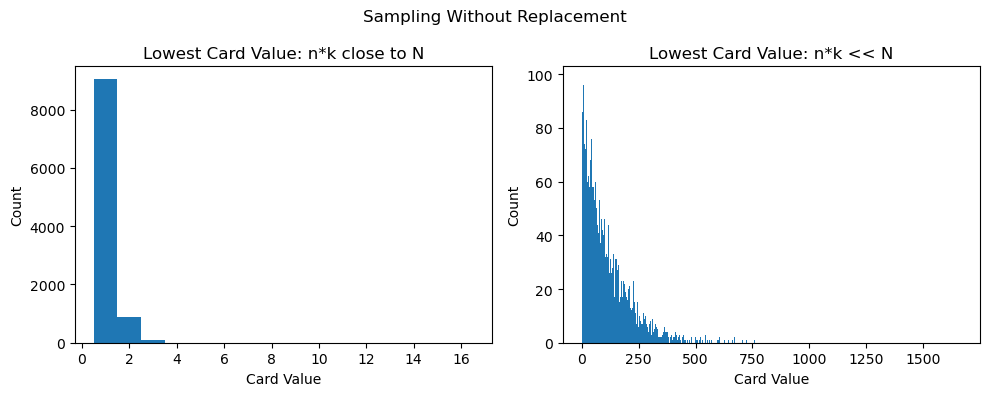

In [15]:
n = 15
k = 6
# repeat sampling m times 
m = 10000
rep = False

fig,ax = plt.subplots(1,2,figsize = (10,4), sharey = False, tight_layout = True)

# sampling without replacement for n*k close to N
N = 100
ax[0].hist(create_lowest(N,n,k,m,rep), bins = np.arange(0.5, (N/6) + 0.5, 1))
ax[0].set_title("Lowest Card Value: n*k close to N")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Card Value")

# sampling without replacement for n*k << N
N = 10000
ax[1].hist(create_lowest(N,n,k,m,rep), bins = np.arange(0.5, (N/6) + 0.5, 1))
ax[1].set_title("Lowest Card Value: n*k << N")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Card Value")

fig.suptitle("Sampling Without Replacement")
plt.show()

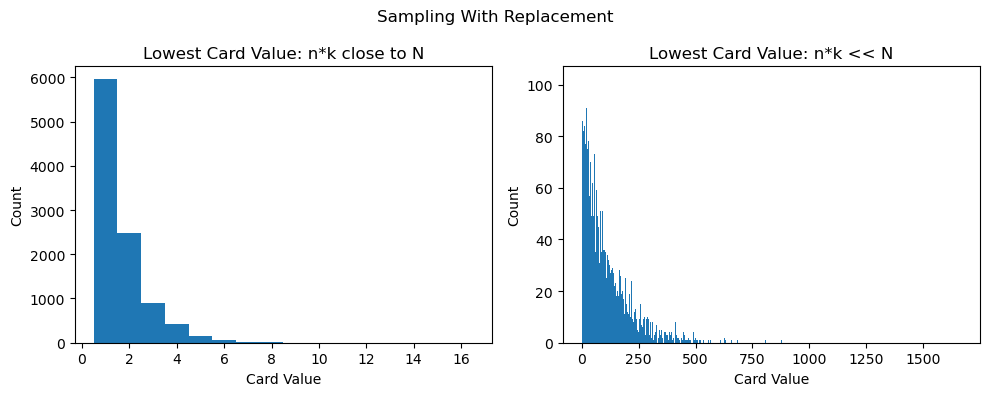

In [16]:
n = 15
k = 6
# repeat sampling m times 
m = 10000
rep = True

fig,ax = plt.subplots(1,2,figsize = (10,4), sharey = False, tight_layout = True)

# sampling with replacement for n*k close to N
N = 100
ax[0].hist(create_lowest(N,n,k,m,rep), bins = np.arange(0.5, (N/6) + 0.5, 1))
ax[0].set_title("Lowest Card Value: n*k close to N")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Card Value")

# sampling with replacement for n*k << N
N = 10000
ax[1].hist(create_lowest(N,n,k,m,rep), bins = np.arange(0.5, (N/6) + 0.5, 1))
ax[1].set_title("Lowest Card Value: n*k << N")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Card Value")

fig.suptitle("Sampling With Replacement")
plt.show()

Whether you are sampling with or without replacement, the greater N is the smoother the distribution of the lowest card value. 

If n * k is close to N, then the distribution from sampling without replacement is noticabley different than the distrbution from sampling with replacement. However, if n * k << N, then sampling with or without replacement produces similar distributions. This is because sampling a small portion from a large population with replacement is about the same as sampling a small portion from a large population with replacment. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: